In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [2]:
def load_dataset(file_path, column_names):
    return pd.read_csv(file_path, sep=':::', names=column_names)

In [3]:
movie_train = load_dataset("train_data.txt", ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
movie_test = load_dataset("test_data.txt", ['ID', 'TITLE', 'DESCRIPTION', 'GENRE'])
movie_test_solution = load_dataset("test_data_solution.txt", ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

C:\Users\10\AppData\Local\Temp\ipykernel_23432\3815162600.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_path, sep=':::', names=column_names)
C:\Users\10\AppData\Local\Temp\ipykernel_23432\3815162600.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_path, sep=':::', names=column_names)
C:\Users\10\AppData\Local\Temp\ipykernel_23432\3815162600.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warn

In [4]:
def display_data(dataframe):
    display(dataframe.head())
    print(f"Shape of Data: {dataframe.shape}")


In [5]:
display_data(movie_train)
display_data(movie_test)
display_data(movie_test_solution)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Shape of Data: (54214, 4)


,ID,TITLE,DESCRIPTION,GENRE
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Shape of Data: (54200, 4)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Shape of Data: (54200, 4)


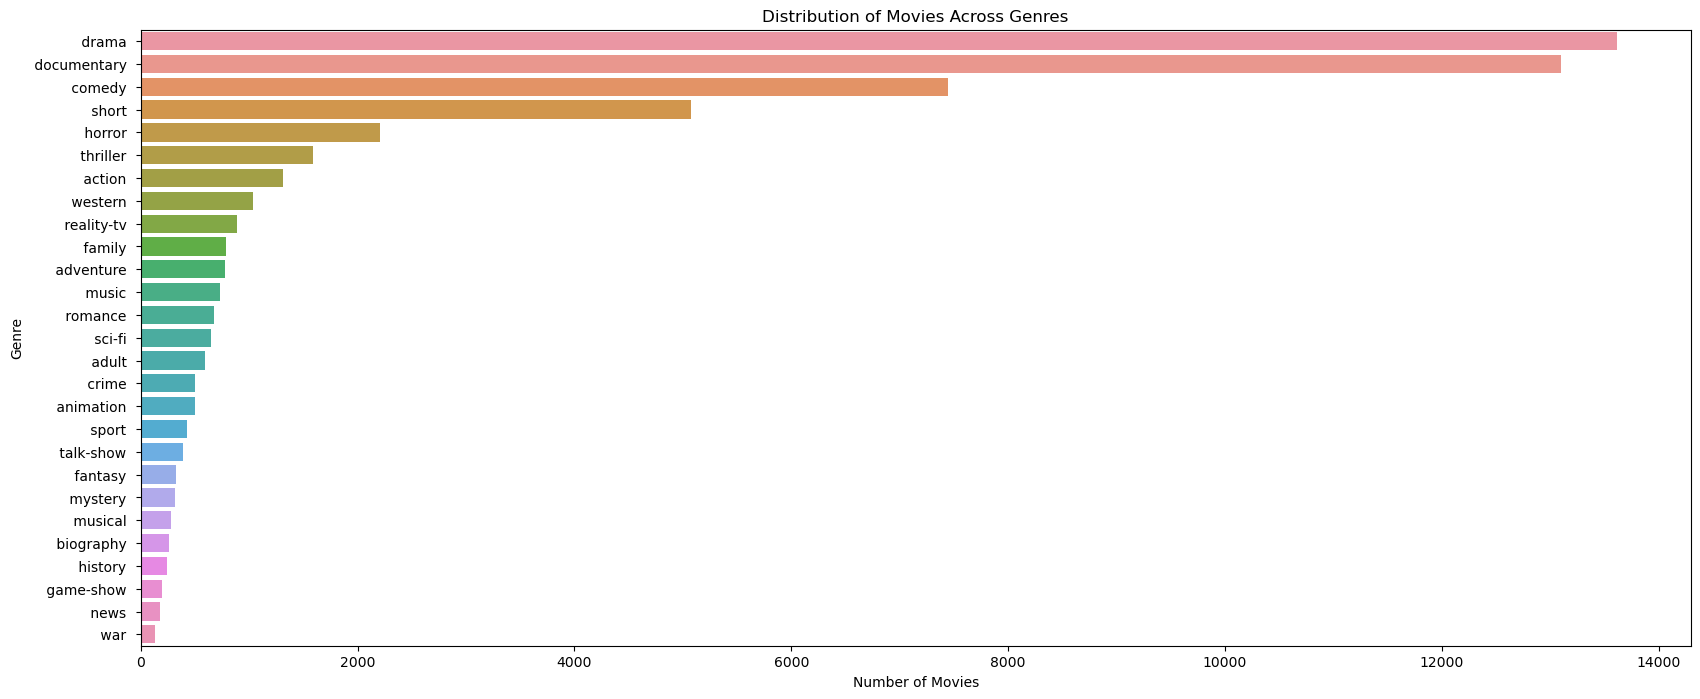

In [6]:
def plot_genre_distribution(df, title):
    plt.figure(figsize=(20, 8))
    sns.countplot(y=df['GENRE'], order=df['GENRE'].value_counts().index)
    plt.title(title)
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.show()

plot_genre_distribution(movie_train, 'Distribution of Movies Across Genres')

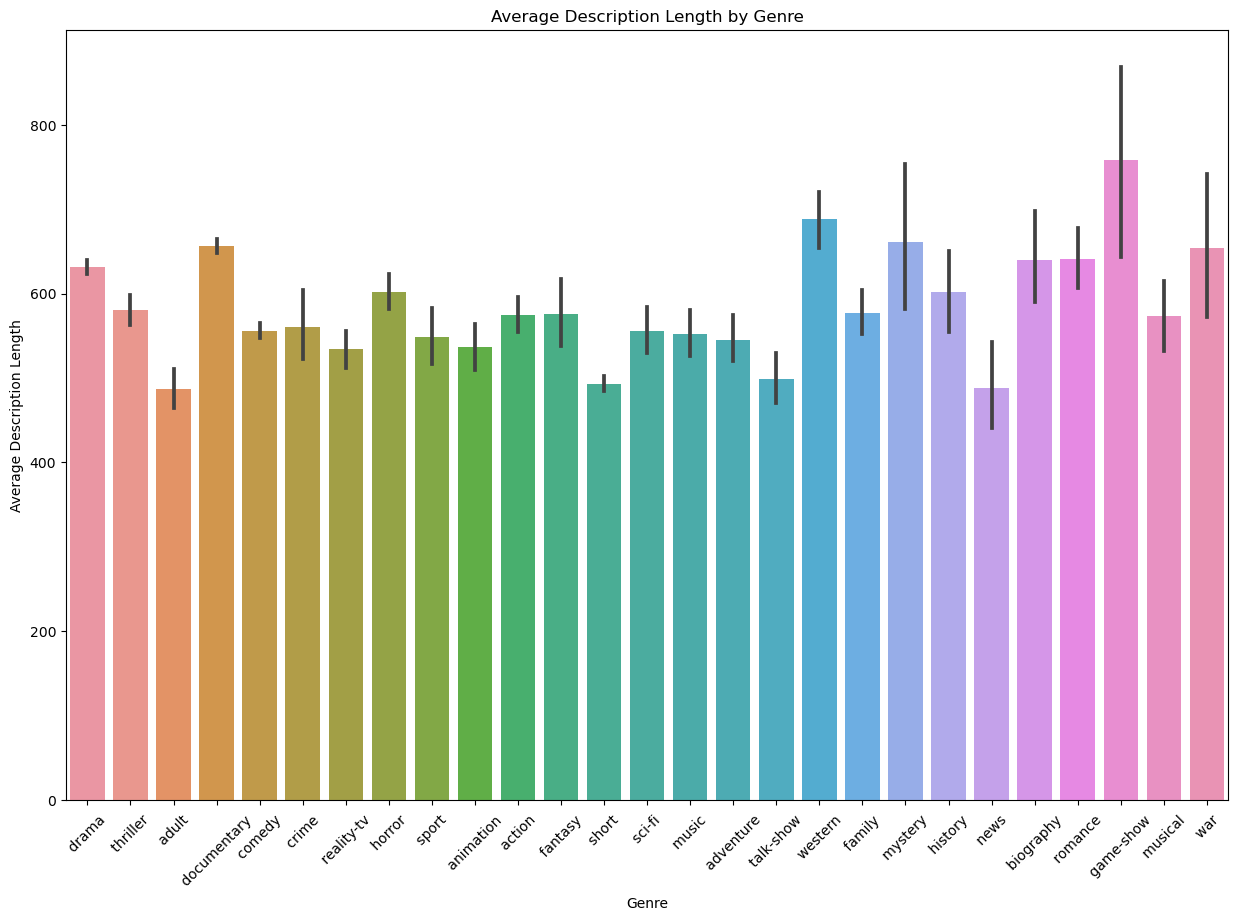

In [7]:
movie_train['DESC_LEN'] = movie_train['DESCRIPTION'].str.len()
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESC_LEN', data=movie_train)
plt.title('Average Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Description Length')
plt.show()

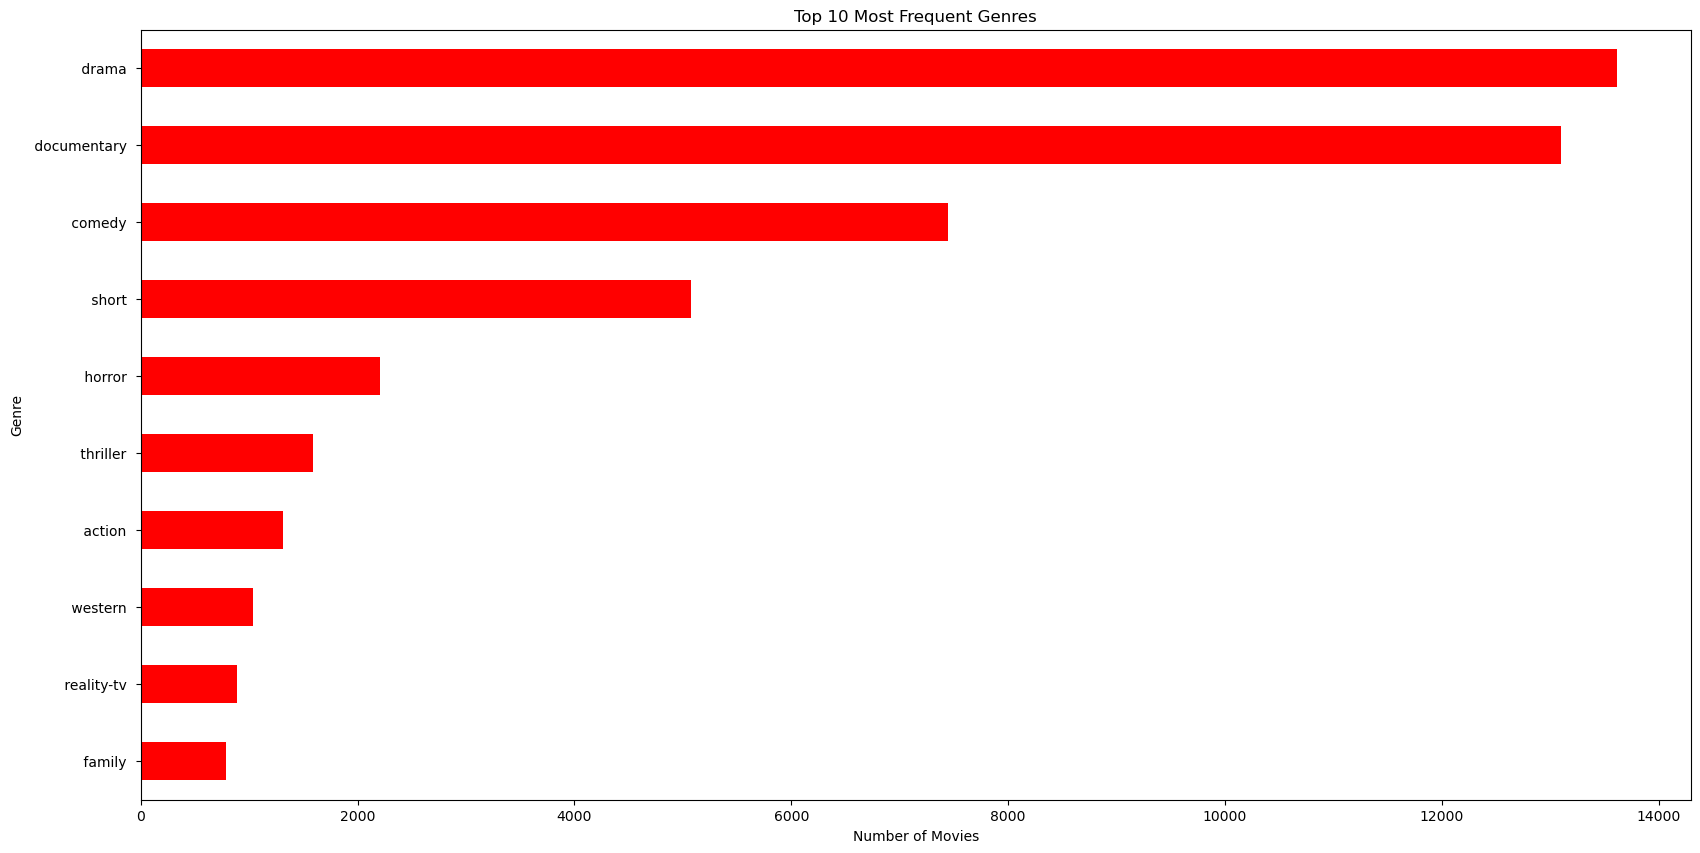

In [8]:
top_genres = movie_train['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='red')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [9]:
# Handle any potential missing values
movie_train['DESCRIPTION'].fillna("", inplace=True)
movie_test['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(movie_train['DESCRIPTION'])
X_test = t_v.transform(movie_test['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(movie_train['GENRE'])
y_test = label_encoder.transform(movie_test_solution['GENRE'])

In [10]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [11]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5793173431734318
Test Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.32      0.37      1314
           1       0.64      0.38      0.48       590
           2       0.51      0.23      0.31       775
           3       0.45      0.14      0.21       498
           4       0.00      0.00      0.00       264
           5       0.53      0.58      0.56      7446
           6       0.30      0.07      0.11       505
           7       0.68      0.82      0.75     13096
           8       0.56      0.71      0.63     13612
           9       0.36      0.14      0.21       783
          10       0.26      0.06      0.09       322
          11       0.80      0.62      0.70       193
          12       0.28      0.02      0.04       243
          13       0.60      0.62      0.61      2204
          14       0.62      0.52      0.56       731
          15       0.37      0.08      0.13       276
          16      

In [12]:
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)
Mnb_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7])

In [ ]:
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)


In [ ]:
lr_classifier.predict(X_test)

In [13]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police kill a man"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 thriller 
 drama 
